In [1]:
using CSV, FileIO

In [2]:
data = load("../data/impvol_data.jld2")

Dict{String,Any} with 10 entries:
  "import_shares"             => [0.0 7.85e-7 … 0.000689 0.0004425; 7.42e-5 0.0…
  "pwt"                       => [0.824111 0.620073 … 0.747101 1.0]…
  "va"                        => [3271.5 1407.45 … 4209.16 41311.0]…
  "p_sectoral_data"           => [33.0109 64.7924 … 16.8926 36.7882]…
  "io_values"                 => [2.49202e5 2423.0 … 6491.5 0.0; 4183.8 56086.1…
  "total_output"              => [2.00728e6 8.11942e5 … 1.74308e6 66853.4]…
  "intermediate_input_shares" => [0.973154 0.0268455 … 0.528231 0.294862]…
  "trade_balance"             => [1184.95 -1239.14 … -406.84 1074.1]…
  "output_shares"             => [0.967079 0.032921 … 0.521898 0.318506]…
  "beta"                      => [0.230777 0.441 … 0.297884 0.370242]…

In [3]:
country_names = CSV.read("../experiments/baseline/output_table.csv")[:country_names]

25-element Array{Union{Missings.Missing, String},1}:
 "Australia"             
 "Austria"               
 "Belgium and Luxembourg"
 "Canada"                
 "China"                 
 "Colombia"              
 "Denmark"               
 "Finland"               
 "France"                
 "Germany"               
 "Greece"                
 "India"                 
 "Ireland"               
 "Italy"                 
 "Japan"                 
 "Mexico"                
 "Netherlands"           
 "Norway"                
 "Portugal"              
 "ROW"                   
 "South Korea"           
 "Spain"                 
 "Sweden"                
 "United Kingdom"        
 "United States"         

In [4]:
cpi = CSV.read("../data/cpi.csv")

,Time,Australia [AUS],Austria [AUT],Belgium [BEL],Canada [CAN],China [CHN],Colombia [COL],Denmark [DNK],Finland [FIN],France [FRA],Germany [DEU],Greece [GRC],India [IND],Ireland [IRL],Italy [ITA],Japan [JPN],Mexico [MEX],Netherlands [NLD],Norway [NOR],Portugal [PRT],ROW,"Korea, Rep. [KOR]",Spain [ESP],Sweden [SWE],United Kingdom [GBR],United States [USA]
1,1972,11.4464,28.1734,23.0586,18.8251,missing,0.202248,16.4406,14.9587,17.2391,35.3053,1.48606,5.21488,9.55302,6.76819,36.4413,0.018673,29.0088,15.909,2.2689,missing,6.82487,6.02514,15.5837,11.3749,19.1771
2,1973,12.487,30.2951,24.6624,20.2347,missing,0.247814,17.9701,16.5675,18.5115,37.7879,1.71469,6.09767,10.6435,7.49906,40.6717,0.020929,31.336,17.0893,2.56328,missing,7.0447,6.71301,16.6306,12.4209,20.3618
3,1974,14.4121,33.1798,27.7891,22.4599,missing,0.306969,20.7151,19.3734,21.0381,40.428,2.17012,7.84171,12.4503,8.93587,50.1166,0.0259068,34.3415,18.6977,3.20623,missing,8.75686,7.76564,18.279,14.4137,22.6127
4,1975,16.5973,35.9819,31.3373,24.8569,missing,0.378915,22.7049,22.8241,23.4966,42.8174,2.46588,8.29171,15.0494,10.4505,55.9959,0.0297784,37.8504,20.8833,3.69587,missing,10.9679,9.08217,20.0667,17.9029,24.6803
5,1976,18.8085,38.6153,34.1791,26.7315,missing,0.454059,24.7507,26.0977,25.7583,44.6357,2.78704,7.65869,17.7562,12.1868,61.2449,0.0344908,41.1928,22.7966,4.47725,missing,12.649,10.6829,22.1234,20.8675,26.0981
6,1977,21.1238,40.737,36.6045,28.8638,missing,0.607543,27.454,29.1755,28.2039,46.3024,3.1318,8.29602,20.1483,14.2744,66.2436,0.0445152,43.8289,24.8719,5.86595,missing,13.9261,13.3043,24.6547,24.173,27.7949
7,1978,22.8148,42.1931,38.2409,31.4539,missing,0.715462,30.2581,31.4509,30.813,47.5613,3.52554,8.50487,21.702,16.0008,69.0322,0.0522864,45.6311,26.9019,7.10007,missing,15.9399,15.935,27.119,26.1704,29.9159
8,1979,24.8959,43.7574,39.9499,34.3303,missing,0.888132,33.1662,33.7994,34.0935,49.4845,4.19871,9.03669,24.5874,18.3687,71.5877,0.0617979,47.5473,28.1151,8.65493,missing,18.8606,18.4305,29.0742,29.6828,33.2828
9,1980,27.4194,46.5265,42.6061,37.8077,missing,1.12395,37.2474,37.7183,38.7175,52.1769,5.23478,10.0637,29.0511,22.2379,77.1562,0.0780827,50.6443,31.1736,10.0282,missing,24.2731,21.2986,33.0592,35.0156,37.7924
10,1981,30.0208,49.6917,45.8559,42.5229,missing,1.43252,41.6304,41.9826,43.8725,55.4872,6.51762,11.3836,34.9698,26.2338,80.9462,0.0998941,54.0571,35.4267,11.9377,missing,29.4559,24.3974,37.0607,39.1743,41.6981


In [5]:
cpi[end:end,:]

,Time,Australia [AUS],Austria [AUT],Belgium [BEL],Canada [CAN],China [CHN],Colombia [COL],Denmark [DNK],Finland [FIN],France [FRA],Germany [DEU],Greece [GRC],India [IND],Ireland [IRL],Italy [ITA],Japan [JPN],Mexico [MEX],Netherlands [NLD],Norway [NOR],Portugal [PRT],ROW,"Korea, Rep. [KOR]",Spain [ESP],Sweden [SWE],United Kingdom [GBR],United States [USA]
1,2007,91.4932,94.6791,93.7029,95.6926,92.1719,87.6989,93.2952,94.9684,95.7135,96.0747,90.5951,74.3246,101.54,94.574,100.717,86.734,95.2123,92.0822,96.9385,missing,90.3174,94.6577,96.0454,91.4461,95.087


In [6]:
# to conform with data structures
us_cpi = reshape(cpi[:,end] ./ cpi[1,end], (1,1,1,36))

1×1×1×36 Array{Float64,4}:
[:, :, 1, 1] =
 1.0

[:, :, 1, 2] =
 1.06178

[:, :, 1, 3] =
 1.17916

...

[:, :, 1, 34] =
 4.67019

[:, :, 1, 35] =
 4.82084

[:, :, 1, 36] =
 4.95837

In [7]:
dollar_price_index = data["pwt"] .* us_cpi

1×25×1×36 Array{Float64,4}:
[:, :, 1, 1] =
 0.824111  0.620073  0.816447  1.0138  …  0.469671  1.04781  0.747101  1.0

[:, :, 1, 2] =
 1.11992  0.781459  0.978674  1.09128  1.46411  …  1.23006  0.811203  1.06178

[:, :, 1, 3] =
 1.50229  0.917049  1.12899  1.26654  …  0.704648  1.3586  0.927185  1.17916

...

[:, :, 1, 34] =
 4.59907  4.81764  5.02688  4.45851  …  4.26361  5.6616  5.1814  4.67019

[:, :, 1, 35] =
 4.68595  4.95986  5.19679  4.86745  …  4.47361  5.84486  5.39862  4.82084

[:, :, 1, 36] =
 5.3599  5.52093  5.75983  5.23868  …  5.02791  6.49408  5.97413  4.95837

In [8]:
real_GDP_data = sum(data["va"], 3) ./ dollar_price_index

1×25×1×36 Array{Float64,4}:
[:, :, 1, 1] =
 64455.1  32858.7  40728.9  96150.9  …  37030.6  1.99307e5  1.12031e6

[:, :, 1, 2] =
 67128.2  32424.2  43883.7  1.04472e5  …  38390.3  2.09845e5  1.18077e6

[:, :, 1, 3] =
 63633.2  33232.6  44721.9  1.10412e5  …  40143.4  2.01172e5  1.15325e6

...

[:, :, 1, 34] =
 1.34195e5  57052.8  73653.4  2.36952e5  …  57251.3  3.9192e5  2.50782e6

[:, :, 1, 35] =
 1.41819e5  59326.7  75818.1  2.45268e5  …  59829.6  4.03127e5  2.57403e6

[:, :, 1, 36] =
 1.47524e5  61390.0  78980.8  2.5416e5  …  62356.9  4.19185e5  2.62123e6

In [9]:
include("../output.jl")
using ImpvolOutput
results = load("../experiments/baseline/actual/results.jld2")["results"]
parameters = load("../experiments/baseline/common_parameters.jld2")["parameters"]
real_GDP_model = sum(ImpvolOutput.make_series(results, :real_GDP), 3)

1×25×1×36 Array{Float64,4}:
[:, :, 1, 1] =
 46329.5  18227.6  30702.0  84255.4  …  31594.7  1.47282e5  1.13191e6

[:, :, 1, 2] =
 58488.1  20463.5  36255.2  93531.1  …  35204.6  1.56358e5  1.20526e6

[:, :, 1, 3] =
 63991.6  22340.2  37684.4  1.05052e5  …  37542.0  1.56368e5  1.19668e6

...

[:, :, 1, 34] =
 242588.0  1.0853e5  1.43372e5  424351.0  …  1.20807e5  7.85543e5  4.91564e6

[:, :, 1, 35] =
 256612.0  1.13625e5  145256.0  4.51629e5  …  1.26859e5  8.16832e5  5.04902e6

[:, :, 1, 36] =
 2.78631e5  123349.0  154699.0  4.95048e5  …  1.36982e5  8.80958e5  5.16608e6

In [10]:
data_volatility = ImpvolOutput.calculate_volatilities(real_GDP_data, parameters, true)[:].^0.5
model_volatility = ImpvolOutput.calculate_volatilities(real_GDP_model, parameters, true)[:].^0.5
[data_volatility model_volatility]

25×2 Array{Float64,2}:
 0.0305473  0.0429312
 0.0107807  0.044273 
 0.0167103  0.0503053
 0.0145287  0.0192131
 0.0754594  0.0527721
 0.0283547  0.0395823
 0.0152353  0.0436481
 0.0224505  0.047073 
 0.0126346  0.0437575
 0.0129384  0.0474551
 0.0156778  0.0364188
 0.0310229  0.0337849
 0.0254603  0.0468543
 0.0102044  0.0452113
 0.0148759  0.0464954
 0.0250657  0.0737169
 0.01077    0.0395221
 0.0244207  0.0302613
 0.0327996  0.0483393
 0.0392363  0.0288986
 0.0325697  0.0500414
 0.0130455  0.0478338
 0.0150565  0.0444347
 0.014959   0.0411827
 0.0162804  0.0154176

In [11]:
function regression(x, y)
    X = [ones(length(x)) x]
    beta = X \ y
    R2 = var(X * beta) / var(y)
    return (beta, R2, X*beta)
end

regression (generic function with 1 method)

In [12]:
beta, R2, fitted = regression(data_volatility, model_volatility)
correlation = R2^.5


0.16201339367668777

In [13]:
using Plots
fm = x->repr(round(x, 3))
label = "y = $(fm(beta[1]))+$(fm(beta[2]))x\nR2 = $(fm(R2))"
plot(data_volatility, fitted, label=label, xlabel="Data volatility (standard deviation)", size=(800,500))
scatter!(data_volatility, model_volatility, label="", ylabel="Model volatility (standard deviation)")
x = 0.002
for i=1:length(data_volatility)
    annotate!(data_volatility[i], model_volatility[i]+x, text(country_names[i], :black, :center, 10))
end
savefig("../Figure2.pdf")

In [21]:
# without china
beta, R2 = regression([data_volatility[1:4]; data_volatility[6:end]], [model_volatility[1:4]; model_volatility[6:end]])
correlation = R2^.5

0.9021922265297351

In [23]:
# correlation of variances
beta, R2 = regression(data_volatility.^2, model_volatility.^2)
correlation = R2^.5

0.9886188789008895

In [24]:
# correlation of variances
# without china
beta, R2 = regression([data_volatility[1:4]; data_volatility[6:end]].^2, [model_volatility[1:4]; model_volatility[6:end]].^2)
correlation = R2^.5

0.9056866572357395

In [17]:
A = ImpvolOutput.make_series(results, :A_njs)

1×25×24×36 Array{Float64,4}:
[:, :, 1, 1] =
 1707.1  647.846  845.954  2239.55  …  1325.45  1017.34  1821.14  7165.76

[:, :, 2, 1] =
 296.294  165.927  221.908  268.472  …  212.872  202.054  321.468  580.413

[:, :, 3, 1] =
 765.02  682.769  760.992  968.586  …  798.828  703.401  1885.37  4490.71

...

[:, :, 22, 1] =
 670.624  65.1541  344.673  1065.41  …  753.007  606.035  1288.34  3309.09

[:, :, 23, 1] =
 926.76  667.461  913.672  1165.37  …  1050.43  852.784  1844.01  3866.28

[:, :, 24, 1] =
 11468.0  6984.89  7999.58  14834.2  …  13412.4  8695.86  20710.2  59285.3

[:, :, 1, 2] =
 1695.01  618.946  823.099  2116.59  …  1285.54  861.852  1580.51  7096.77

[:, :, 2, 2] =
 298.799  158.427  206.48  260.663  …  220.155  198.061  303.154  546.077

[:, :, 3, 2] =
 823.663  771.622  768.303  975.766  …  832.098  748.295  1692.18  4187.57

...

[:, :, 22, 2] =
 733.316  64.3315  414.405  1056.82  …  799.291  597.094  1296.73  3462.13

[:, :, 23, 2] =
 1186.45  707.368  1075.91  1213.76

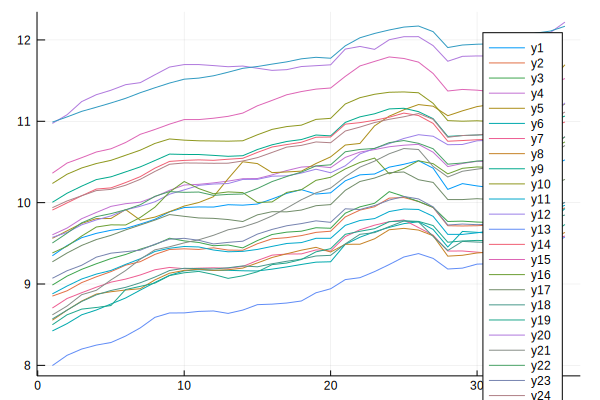

In [20]:
plot(log.(A[1,:,end,:]'))

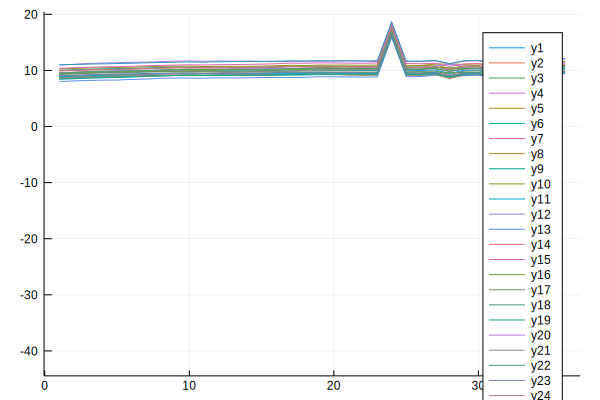

In [39]:
p = load("../experiments/baseline/common_parameters.jld2")["parameters"]
A_data = p[:A]
plot(log.(A_data[1,:,end,:]'))

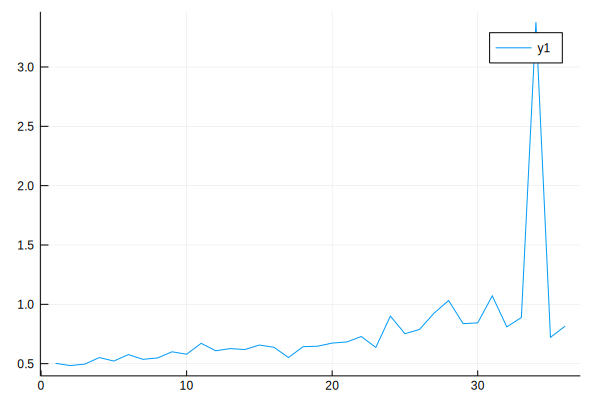

In [40]:
plot(p[:nu_njt][1,1,end,:])

In [43]:
nu_guess = p[:final_expenditure_shares]

1×25×24×36 Array{Float64,4}:
[:, :, 1, 1] =
 0.0155244  0.0249547  -0.00308011  …  0.0669844  -0.0215453  0.00345035

[:, :, 2, 1] =
 0.0749852  0.0633527  0.1205  0.0841586  …  0.093235  0.131312  0.0648263

[:, :, 3, 1] =
 0.00350737  0.0179595  0.00149248  …  0.00157639  0.00620359  0.00279835

...

[:, :, 22, 1] =
 0.0175694  -0.0875952  0.00842429  …  0.0053662  0.0218519  0.014794

[:, :, 23, 1] =
 0.0161633  0.016592  0.0345386  …  0.00755546  0.00372675  0.014234

[:, :, 24, 1] =
 0.630541  0.281001  0.319631  0.688538  …  0.718415  0.586555  0.652321

[:, :, 1, 2] =
 0.033939  0.0470475  -0.00234287  …  0.0746569  -0.0229194  0.0224292

[:, :, 2, 2] =
 0.0525279  0.0848132  0.135862  0.0792014  …  0.116864  0.118066  0.0600313

[:, :, 3, 2] =
 0.0029769  0.0261618  0.00165648  …  0.00161724  0.00463774  0.0025508

...

[:, :, 22, 2] =
 0.0224687  -0.387285  0.0207468  …  0.116892  0.00498871  0.0142167

[:, :, 23, 2] =
 0.0174049  0.0204902  0.0419344  …  0.00783221  -0.011865

In [45]:
J=p[:J]
T = p[:T]
nu = copy(nu_guess)
for j = 1:J, t=1:T
			vector = nu_guess[1,:,j,t]
			nu[1,vector .<= 0,j,t] = minimum(vector[vector .> 0])
		end


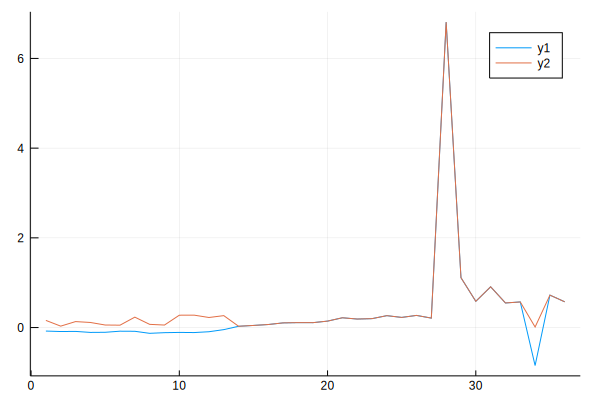

In [53]:
plot([nu_guess[1,5,end,:] nu[1,5,end,:]])

In [54]:
nu_guess[1,end,:,:]

24×36 Array{Float64,2}:
  0.00345035   0.0224292    0.00890236   …  -0.0500849    -0.0426757  
  0.0648263    0.0600313    0.0606516        0.04725       0.0432172  
  0.00279835   0.0025508    0.00245863       0.0042588     0.00361451 
  0.0165587    0.0156772    0.0134165        0.00642195    0.00571356 
  0.0197843    0.018004     0.01658          0.00398179    0.00296079 
  0.00287283   0.00258826   0.0021878    …   0.00296916    0.00297555 
  0.0052272    0.00536509   0.00240753       0.00116982    0.00012009 
  0.0124985    0.0128232    0.0151387        0.00470791    0.00411321 
  0.00567562   0.00413207   0.00245164      -0.0087558    -0.00811202 
  0.00150858   0.00462674   0.0083584       -0.0203715     0.020954   
  0.0123103    0.00914071   0.0124742    …   0.0827693     0.0121071  
 -0.00376203  -0.003928    -0.00442297      -0.00167773    0.00135931 
  0.00296337   0.00204715   0.000526025     -0.00226254   -0.0025493  
 -0.00419949  -0.00257268   0.00329712      -0.005441

In [56]:
p[:nu_njt][1,1,:,:]

24×36 Array{Float64,2}:
  0.0833179     0.0901267    0.081704     …  -0.00142279   -0.00598749 
  0.09348       0.0879668    0.0834849        0.0538693     0.060137   
  0.0080607     0.00738491   0.00706085       0.00566812    0.00554451 
  0.0312768     0.0311803    0.0261622        0.00976672    0.00535977 
  0.0176225     0.0159068    0.0137487        0.00450771    0.00483642 
  0.00598391    0.00625452   0.00582997   …   0.000223895   0.00406285 
  0.00752167    0.00805283   0.00466681       0.000400349   0.000571763
  0.012269      0.0124004    0.0147086        0.004352      0.00354918 
  0.00244841    0.00136198   7.57993e-5      -0.00550811   -0.0049725  
  0.0243838     0.0296491    0.0330667        0.0108768     0.0162915  
  0.0179984     0.015845     0.018986     …   0.115427     -0.00324187 
  0.000868655  -0.00100447   0.000293432     -0.0135236    -0.000225284
  0.0136516     0.0127919    0.0106487        0.00307209    0.00281788 
  0.00514262    0.00979203   0.0103748  

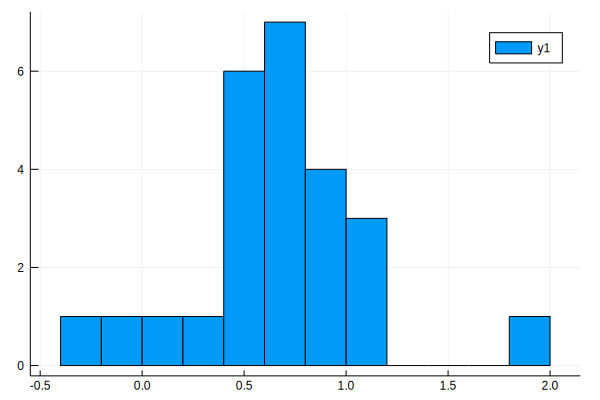

In [60]:
histogram(nu_guess[1,:,end,end])

In [62]:
vector = sort(nu_guess[1,:,end,end])

25-element Array{Float64,1}:
 -0.25576  
 -0.186071 
  0.0841557
  0.327335 
  0.405356 
  0.527353 
  0.551897 
  0.57364  
  0.590938 
  0.597717 
  0.658318 
  0.68628  
  0.691164 
  0.703062 
  0.745911 
  0.756696 
  0.778054 
  0.814095 
  0.830017 
  0.831141 
  0.874268 
  1.00649  
  1.01995  
  1.02341  
  1.99939  

In [63]:
sort(vector[vector .> 0])[2]

0.32733476961562485

In [64]:
			largest = sort(vector[vector .< 1])[end-1]


0.8311405907903878

In [86]:
p = load("../experiments/baseline/common_parameters.jld2")["parameters"]

Dict{Symbol,Any} with 45 entries:
  :S_nt                     => [0.0 0.0 … 0.0 0.0]…
  :one_over_rho             => 0.0
  :inner_tolerance          => 0.0002
  :S_nt_data                => [1184.95 -1239.14 … -406.84 1074.1]…
  :eta                      => 4.0
  :S                        => 101
  :sigma                    => 0.999
  :d                        => [0.991383 7.85e-7 … 0.000689 0.0004425; 7.42e-5 …
  :adjustment_tolerance     => 0.0004
  :middle_step_size         => 0.449329
  :A_njs                    => Array{Float64,4}[[1707.32 647.905 … 1821.11 7165…
  :gamma_jk                 => [0.17112 0.273944 … 0.0195213 0.0108426; 0.04826…
  :p_sectoral               => [1.26077 2.37256 … 1.79398 1.0]…
  :B_j                      => [5.5087]…
  :max_iter_adjustment      => 100
  :w_njt                    => [53118.2 20374.8 … 1.48903e5 1.12031e6]…
  :global_sectoral_shock    => [7.26974e-15]…
  :country_shock_njs        => Array{Float64,4}[[1.02054e-16 -3.57791e-16 … 9.4…
  :idi

In [87]:
p[:nu_njt][1,1,:,:]'

36×24 Array{Float64,2}:
 0.0827749  0.0910213  0.00772248  …  0.011307    0.0127253   0.485458
 0.0807635  0.0877083  0.00731351     0.011538    0.0118935   0.492392
 0.0785585  0.084983   0.00698622     0.0119872   0.0112555   0.499805
 0.0756376  0.0833336  0.0067202      0.0125788   0.0109285   0.509434
 0.071999   0.0820821  0.00646377     0.0130788   0.0108497   0.519888
 0.068387   0.080756   0.00625935  …  0.013352    0.0108942   0.529839
 0.0648656  0.0788119  0.00612425     0.0131984   0.0109542   0.539148
 0.0613875  0.076518   0.00612078     0.013598    0.0107204   0.548114
 0.0585357  0.0747564  0.00624306     0.0144932   0.0101618   0.55683 
 0.0568304  0.0734326  0.00644971     0.0152032   0.00940803  0.564635
 0.0561731  0.072342   0.00663495  …  0.0151155   0.0085182   0.571362
 0.0562776  0.0711944  0.00669893     0.0139731   0.00785467  0.575553
 0.0567141  0.069784   0.00663819     0.0120471   0.00749985  0.576222
 ⋮                                 ⋱                 

In [88]:
p[:final_expenditure_shares][1,:,end,:]'

36×25 Array{Float64,2}:
 0.618888  0.25588   0.264002  0.66566   …  0.572098  0.539579  0.637845
 0.623529  0.272103  0.264222  0.663603     0.506991  0.554099  0.648948
 0.631484  0.281444  0.268644  0.666894     0.463591  0.568867  0.658174
 0.644122  0.29269   0.289907  0.67795      0.456812  0.583087  0.664929
 0.656834  0.303963  0.312784  0.690262     0.473429  0.595045  0.669142
 0.666071  0.316942  0.34397   0.700158  …  0.498057  0.601564  0.671537
 0.670453  0.327509  0.358248  0.70875      0.517606  0.60148   0.674042
 0.6723    0.332577  0.345763  0.717768     0.509586  0.595734  0.677981
 0.67728   0.338919  0.326829  0.730949     0.485733  0.589351  0.684039
 0.685523  0.342308  0.325824  0.748048     0.4666    0.582208  0.691319
 0.695045  0.341283  0.343098  0.763738  …  0.436751  0.572166  0.699342
 0.70352   0.351951  0.367993  0.77098      0.385096  0.562886  0.707776
 0.71013   0.371675  0.385028  0.764656     0.313763  0.55033   0.716337
 ⋮                         

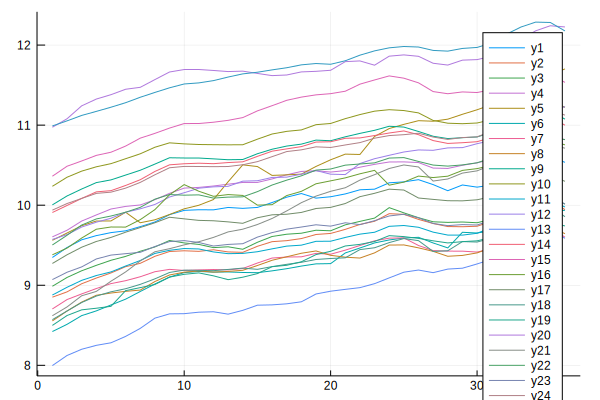

In [90]:
plot(log.(p[:A][1,:,end,:]'))